In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Ignoring the warnings 

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset and understanding about the data

In [3]:
df=pd.read_csv("Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(2772, 7)

In [5]:
ages=df.age.unique()
age_sorted=np.sort(ages)
age_sorted

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

# Data Preprocessing

1. check for null/missing values
2. check for duplicates
3. checking data types
4. checking the no of unique values/categories in each column
5. check stats of dataset

## 1. check for null/missing values

In [6]:
# 1.Checking for missing values

df.isnull().sum()    ### No null/missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2. check for duplicates

In [7]:
df.duplicated().sum()

np.int64(1435)

In [8]:
duplicate_rows = df[df.duplicated()] ## displaying duplicate rows
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.590,0,no,northwest,1639.56310
1338,23,male,34.400,0,no,southwest,1826.84300
1339,56,female,39.820,0,no,southeast,11090.71780
1340,27,male,42.130,0,yes,southeast,39611.75770
1341,19,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [9]:
## Before dropping duplicates
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [10]:
df_cleaned = df.drop_duplicates(inplace=True)   ## after dropping duplicates using (inplace =True)

In [11]:
df  ## 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Observations:
##### No of duplicate rows present in the dataframe is 1435, i.e; 50% of the entries in Dataframe are duplicates

## 3. checking data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [13]:
int_datatype=df.select_dtypes(exclude='object').columns
print('\n Columns with integer datatype:',int_datatype)
object_datatype=df.select_dtypes(include='object').columns
print('\n Columns with object datatype:',object_datatype)


 Columns with integer datatype: Index(['age', 'bmi', 'children', 'charges'], dtype='object')

 Columns with object datatype: Index(['sex', 'smoker', 'region'], dtype='object')


### Insights:

We have 4 integer columns and 3 object columns

## 4. checking the no of unique values/categories in each column

In [14]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 5. check stats of dataset

In [15]:
# Only include numeric columns
df.describe(include=[np.number])

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Observations:
1. mean(Average) age of each person is around 39 years
2. Max age in the dataset is 64 years 

In [16]:
# df.describe(include='all')
          # OR

# Only include categorical columns
df.describe(include=[object])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


### Insights:

1. Majority of the people are non smokers
2. most no of persons are male

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory data analysis

In [18]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [19]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [20]:
numeric_df = df.select_dtypes(include='number')  # Selecting numeric columns only
correlation_matrix = numeric_df.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


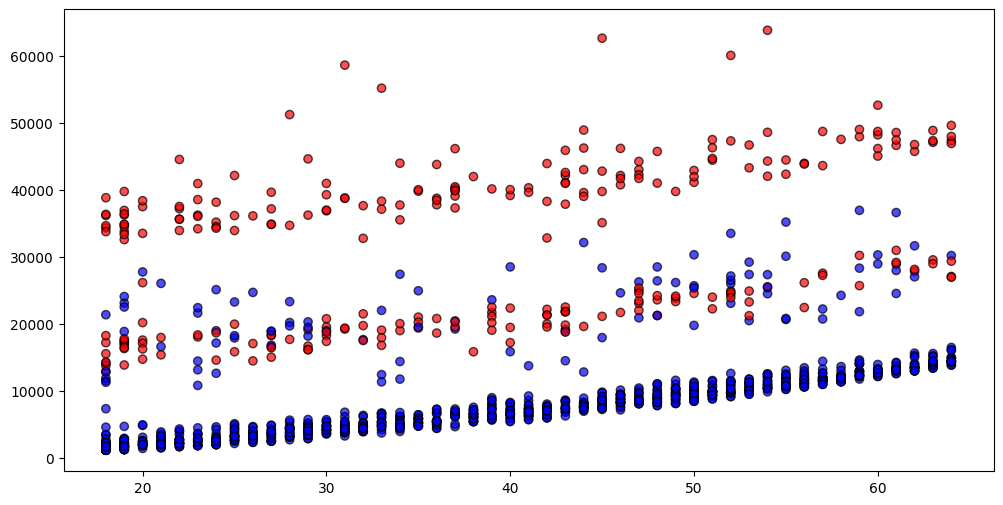

In [21]:
df['smoker_numeric'] = df['smoker'].map({'no': 0, 'yes': 1})

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df['age'],
    y=df['charges'],
    c=df['smoker_numeric'],
    cmap='bwr',  # Blue for non-smokers, red for smokers
    alpha=0.7,
    edgecolor='k')

## Insights:

With increase in age for smokers the medical insurance charges are also quite high

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


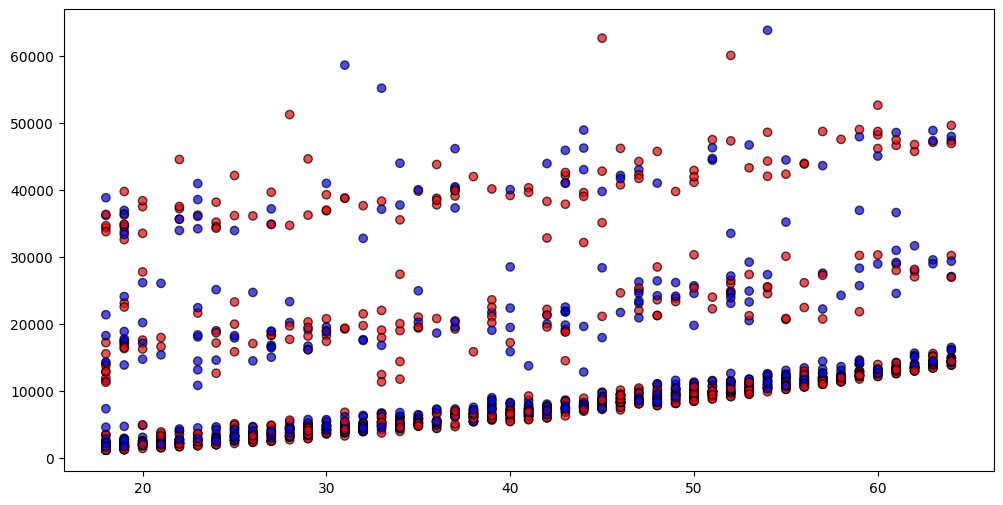

In [23]:
df['sex_numeric'] = df['sex'].map({'female': 0, 'male': 1})

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df['age'],
    y=df['charges'],
    c=df['sex_numeric'],
    cmap='bwr',  # Blue for female, red for male
    alpha=0.7,
    edgecolor='k')

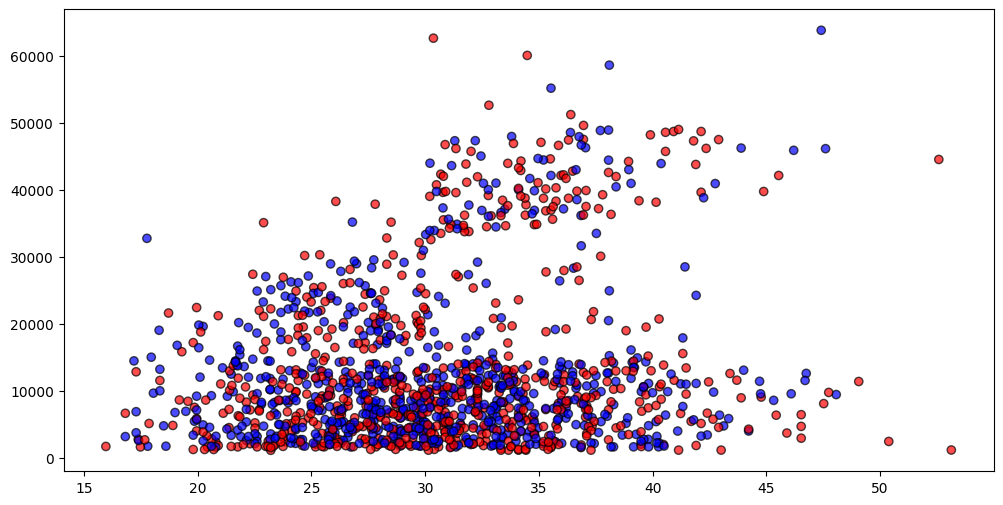

In [24]:
df['sex_numeric'] = df['sex'].map({'female': 0, 'male': 1})

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df['bmi'],
    y=df['charges'],
    c=df['sex_numeric'],
    cmap='bwr',  # Blue for female, red for male
    alpha=0.7,
    edgecolor='k')

In [25]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric
0,19,female,27.90,0,yes,southwest,16884.9240,1,0
1,18,male,33.77,1,no,southeast,1725.5523,0,1


In [30]:
df[df['age'] == 64].sort_values(by='charges')

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,sex_numeric
335,64,male,34.500,0,no,southwest,13822.80300,0,1
534,64,male,40.480,0,no,southeast,13831.11520,0,1
752,64,male,37.905,0,no,northwest,14210.53595,0,1
801,64,female,35.970,0,no,southeast,14313.84630,0,0
768,64,female,39.700,0,no,southwest,14319.03100,0,0
1051,64,male,26.410,0,no,northeast,14394.55790,0,1
635,64,male,38.190,0,no,northeast,14410.93210,0,1
418,64,male,39.160,1,no,southeast,14418.28040,0,1
402,64,female,32.965,0,no,northwest,14692.66935,0,0
199,64,female,39.330,0,no,northeast,14901.51670,0,0


In [34]:
# Calculate correlation matrix using numeric columns
correlation_matrix = df[['age', 'bmi', 'children', 'charges', 'smoker_numeric', 'sex_numeric']].corr()

# Display correlation matrix
correlation_matrix

,age,bmi,children,charges,smoker_numeric,sex_numeric
age,1.000000,0.109344,0.041536,0.298308,-0.025587,-0.019814
bmi,0.109344,1.000000,0.012755,0.198401,0.003746,0.046397
children,0.041536,0.012755,1.000000,0.067389,0.007331,0.017848
charges,0.298308,0.198401,0.067389,1.000000,0.787234,0.058044
smoker_numeric,-0.025587,0.003746,0.007331,0.787234,1.000000,0.076596
sex_numeric,-0.019814,0.046397,0.017848,0.058044,0.076596,1.000000


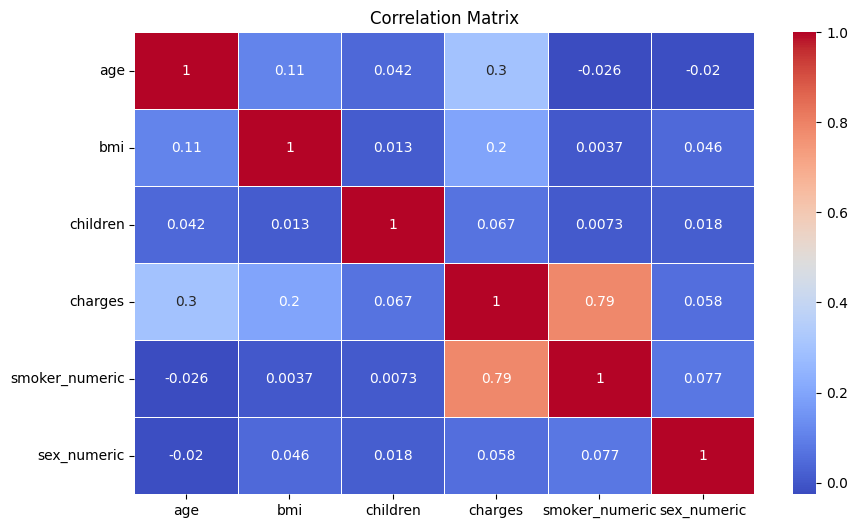

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

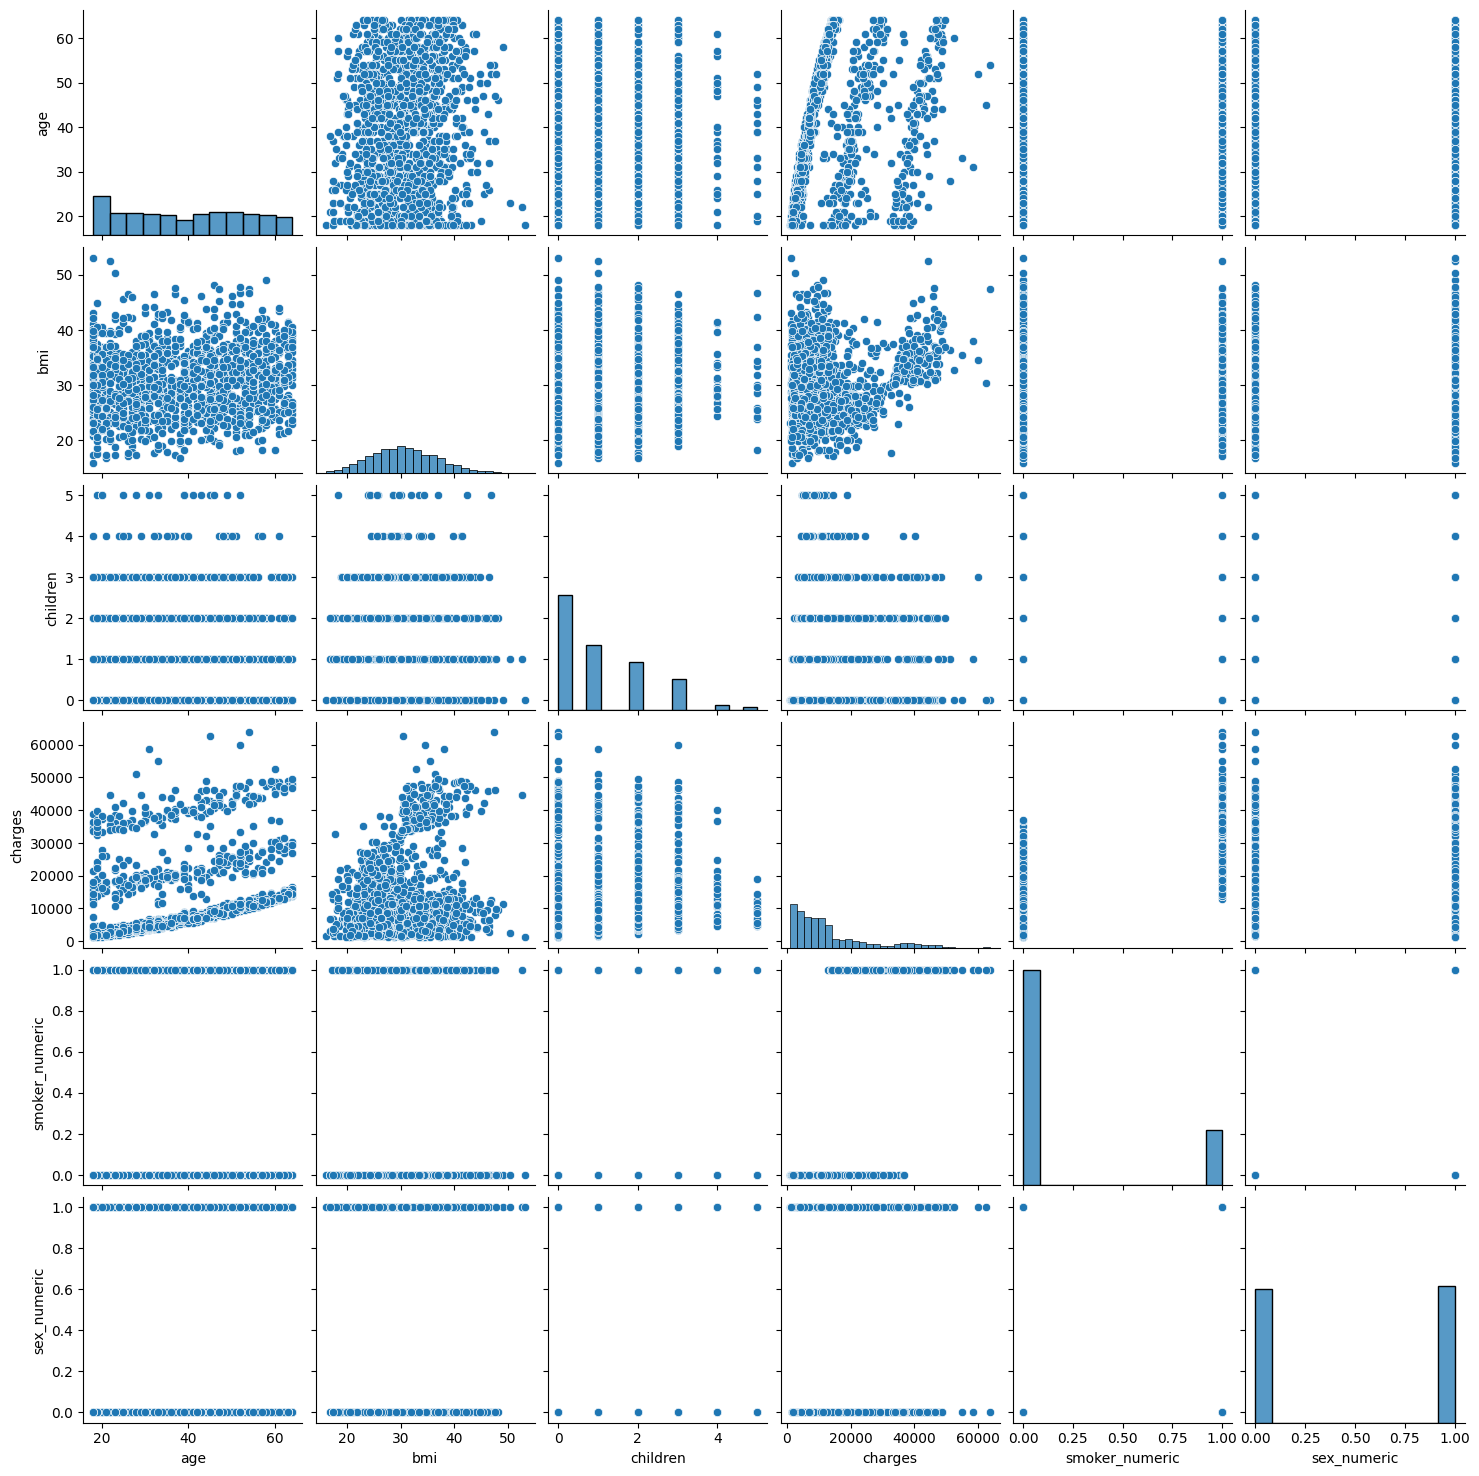

In [36]:
# Visualize pairwise correlations with a pairplot
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'smoker_numeric', 'sex_numeric']])
plt.show()